In [ ]:
#next steps:
#remove just the high end of outliers on med_val
#remove skewness of the data with log transformation

#https://www.kaggle.com/prasadperera/the-boston-housing-dataset
#https://stattrek.com/regression/linear-transformation.aspx

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import lin_reg_tests

## Load Data

In [2]:
# Read in the Boston housing data.
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['med_val'] = boston.target

#Establishing graphing parameters
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data Exploration

In [ ]:
#Questions to address:
#Which features most correlate to med_val?
#can we predict med_val?
#split features into housing characteristics (RM, AGE)
# vs community (rest of features)

In [4]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  med_val  
0     15.3  396.90   4.98     24.0  
1     17.8  396.90   9.14     21.6  
2     17.8  392.83   4.03     34.7  
3     18.7  394.63   2.94     33.4  
4     18.7  396.90   5.33     36.2

In [5]:
#no nulls, clean dataset given it's from scikit-learn
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
med_val    0
dtype: int64

In [6]:
df.describe(include='all')

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT     med_val  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

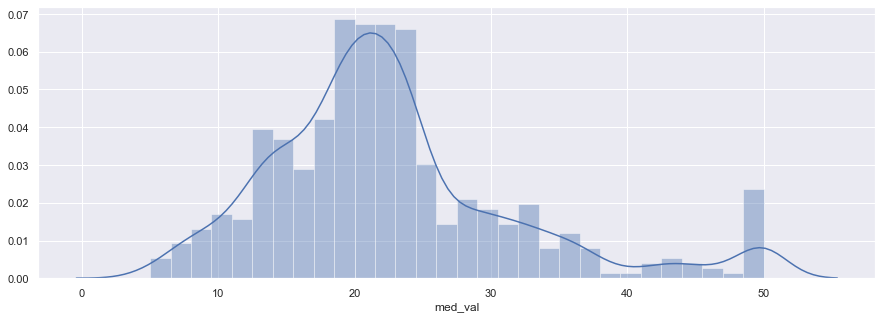

In [7]:
sns.set(rc={'figure.figsize':(15,5)})
sns.distplot(df['med_val'], bins=30)
plt.show()

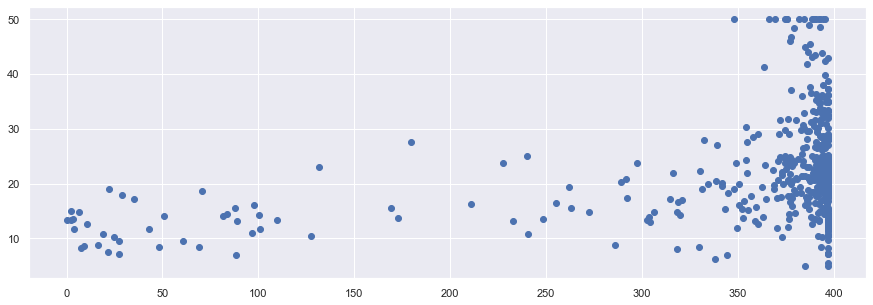

In [69]:
#lower lstat correlates with higher med_val
#higher RM correlates with higher med_val

a = df['B']
b = df['med_val']
plt.plot(a,b,'o')

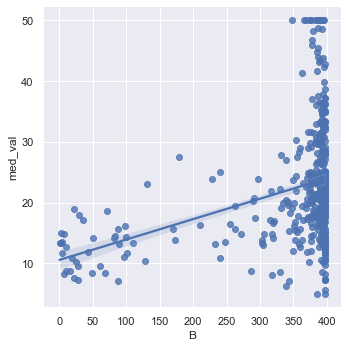

In [72]:
sns.lmplot(x='B', y='med_val',data =df);

In [ ]:
#any outliers? Maybe focus on just the variables that are highly correlated
plt.boxplot(df['CRIM'])

In [28]:
q1, q3 = np.percentile(df['CRIM'],[25,75])
lower = q1 - (1.5 * stats.iqr(df['CRIM']))
upper = q3 + (1.5 * stats.iqr(df['CRIM']))
df.loc[(df['CRIM']<lower) | (df['CRIM']>upper)].sort_values('CRIM')

CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
382   9.18702  0.0   18.1   0.0  0.700  5.536  100.0  1.5804  24.0  666.0   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
448   9.32909  0.0   18.1   0.0  0.713  6.185   98.7  2.2616  24.0  666.0   
429   9.33889  0.0   18.1   0.0  0.679  6.380   95.6  1.9682  24.0  666.0   
439   9.39063  0.0   18.1   0.0  0.740  5.627   93.9  1.8172  24.0  666.0   
..        ...  ...    ...   ...    ...    ...    ...     ...   ...    ...   
414  45.74610  0.0   18.1   0.0  0.693  4.519  100.0  1.6582  24.0  666.0   
410  51.13580  0.0   18.1   0.0  0.597  5.757  100.0  1.4130  24.0  666.0   
405  67.92080  0.0   18.1   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   
418  73.53410  0.0   18.1   0.0  0.679  5.957  100.0  1.8026  24.0  666.0   
380  88.97620  0.0   18.1   0.0  0.671  6.968   91.9  1.4165  24.0  666.0   

     PTRATIO       B  LSTAT  med_val  
382     20.2  396.90  23.60     11.3  
371     20.2  366.15   9.53     50.0  
448     20.2  396.90  18.13     14.1  
429     20.2   60.72  24.08      9.5  
439     20.2  396.90  22.88     12.8  
..       ...     ...    ...      ...  
414     20.2   88.27  36.98      7.0  
410     20.2    2.60  10.11     15.0  
405     20.2  384.97  22.98      5.0  
418     20.2   16.45  20.62      8.8  
380     20.2  396.90  17.21     10.4  

[66 rows x 14 columns]

In [30]:
q1, q3 = np.percentile(df['med_val'],[25,75])
lower = q1 - (1.5 * stats.iqr(df['med_val']))
upper = q3 + (1.5 * stats.iqr(df['med_val']))
df.loc[(df['med_val']<lower) | (df['med_val']>upper)].sort_values('med_val').head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
405  67.92080   0.0  18.10   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   
398  38.35180   0.0  18.10   0.0  0.693  5.453  100.0  1.4896  24.0  666.0   
190   0.09068  45.0   3.44   0.0  0.437  6.951   21.5  6.4798   5.0  398.0   
179   0.05780   0.0   2.46   0.0  0.488  6.980   58.4  2.8290   3.0  193.0   
291   0.07886  80.0   4.95   0.0  0.411  7.148   27.7  5.1167   4.0  245.0   

     PTRATIO       B  LSTAT  med_val  
405     20.2  384.97  22.98      5.0  
398     20.2  396.90  30.59      5.0  
190     15.2  377.68   5.10     37.0  
179     17.8  396.90   5.04     37.2  
291     19.2  396.90   3.56     37.3

## Modeling (Linear Regression using all features)

In [8]:
X = df[df.columns.drop(['med_val'])]
y = df['med_val']

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [9]:
#instantiate, fit, and predict baseline model
lr_mod = LinearRegression()
lr_mod.fit(X, y)
lr_preds = lr_mod.predict(X)

#baseline accuracy score .741
lr_mod.score(X,y)

0.7406426641094094

In [10]:
#Age, INDUS, and NOX are not statistically significant at 5% confidence
X_constant = sm.add_constant(X)
mod = sm.OLS(y,X_constant).fit()
print(mod.summary())

X:\Users\AC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                med_val   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          6.72e-135
Time:                        09:07:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

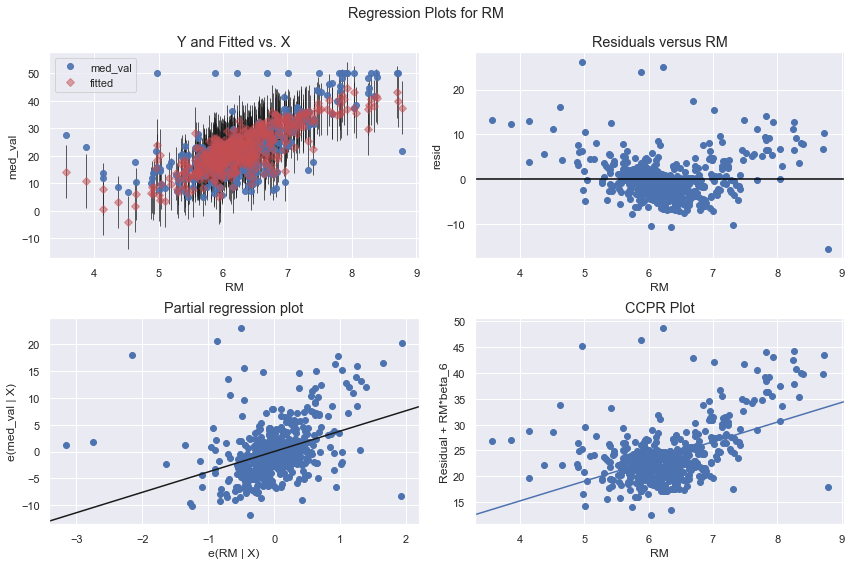

In [11]:
#residuals for RM are not random, closer to 0 around 5-7 RMs
#residuals indicate that there are systematic errors around higher and lower RM count
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(mod, 'RM', fig=fig)

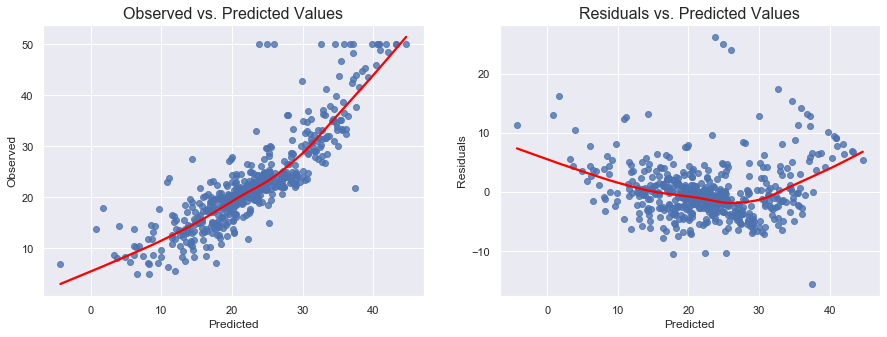

In [12]:
#linear assumption not satisfied
#points are not symmetrically distributed around the lines
lin_reg_tests.linearity_test(mod, y)

In [13]:
#residuals average about 0
mod.resid.mean()

6.392778269857423e-15

In [20]:
#Tax, RAD, NOX, DIS, AGE, INDUS all higher vif, consider for removal
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

CRIM        ZN     INDUS      CHAS      NOX        RM       AGE  \
vif  1.792192  2.298758  3.991596  1.073995  4.39372  1.933744  3.100826   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
vif  3.955945  7.484496  9.008554  1.799084  1.348521  2.941491


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  6.512179e+01
p-value                        6.265431e-09
f-value                        5.590227e+00
f p-value                      1.495776e-09

 Goldfeld-Quandt test ----
                    value
F statistic  2.431147e+00
p-value      7.302072e-12

 Residuals plots ----


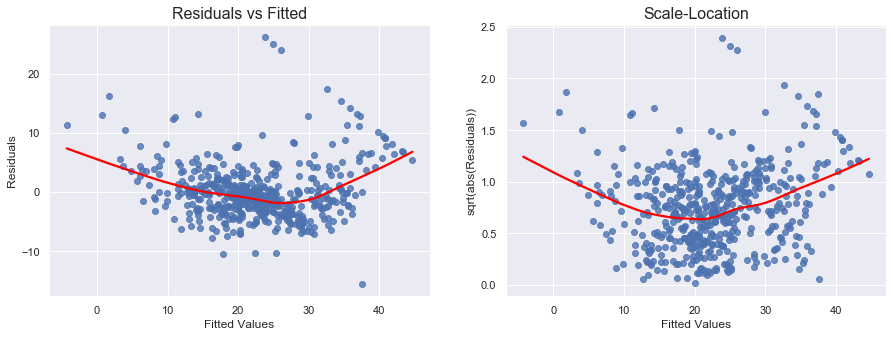

In [21]:
# The residuals are not random, there is a slight u-shape pattern
# reject the hypothesis of homoscedasticity
lin_reg_tests.homoscedasticity_test(mod)

1.0783751186797235


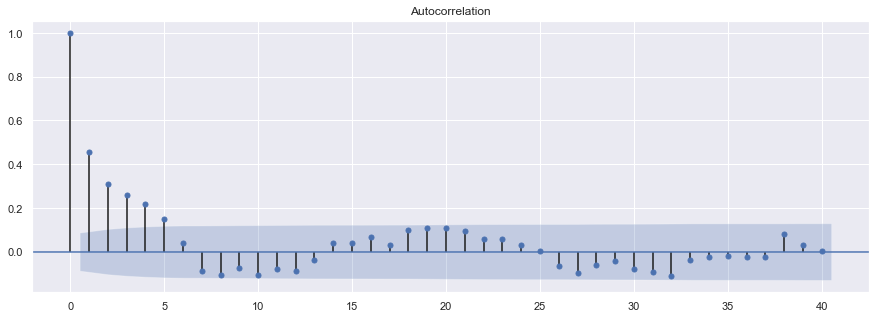

In [15]:
#Dubin-watson test for autocorrelation
# Durbin-watson value of 1.078, slight positive autocorrelation
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(mod.resid))
acf = smt.graphics.plot_acf(mod.resid, lags=40, alpha=0.05)

In [16]:
# cannot prove lack of correlation for any pair
for column in X.columns:
    corr_test = stats.pearsonr(X[column], mod.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.3f}, p-value: {corr_test[1]:.3f}')

Variable: CRIM --- correlation: -0.000, p-value: 1.000
Variable: ZN --- correlation: -0.000, p-value: 1.000
Variable: INDUS --- correlation: 0.000, p-value: 1.000
Variable: CHAS --- correlation: 0.000, p-value: 1.000
Variable: NOX --- correlation: 0.000, p-value: 1.000
Variable: RM --- correlation: 0.000, p-value: 1.000
Variable: AGE --- correlation: 0.000, p-value: 1.000
Variable: DIS --- correlation: -0.000, p-value: 1.000
Variable: RAD --- correlation: -0.000, p-value: 1.000
Variable: TAX --- correlation: -0.000, p-value: 1.000
Variable: PTRATIO --- correlation: 0.000, p-value: 1.000
Variable: B --- correlation: -0.000, p-value: 1.000
Variable: LSTAT --- correlation: 0.000, p-value: 1.000


In [17]:
#more observations than features
df.shape

(506, 14)

In [18]:
#There is some variance in each feature
#NOX and CHAS particularly low variance
X.apply(np.var, axis = 0)

CRIM          73.840360
ZN           542.861840
INDUS         46.971430
CHAS           0.064385
NOX            0.013401
RM             0.492695
AGE          790.792473
DIS            4.425252
RAD           75.666531
TAX        28348.623600
PTRATIO        4.677726
B           8318.280421
LSTAT         50.893979
dtype: float64

Jarque-Bera test ---- statistic: 783.1263, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9014, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3329, p-value: 0.0000
Anderson-Darling test ---- statistic: 10.5207, 5% critical value: 0.7810
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


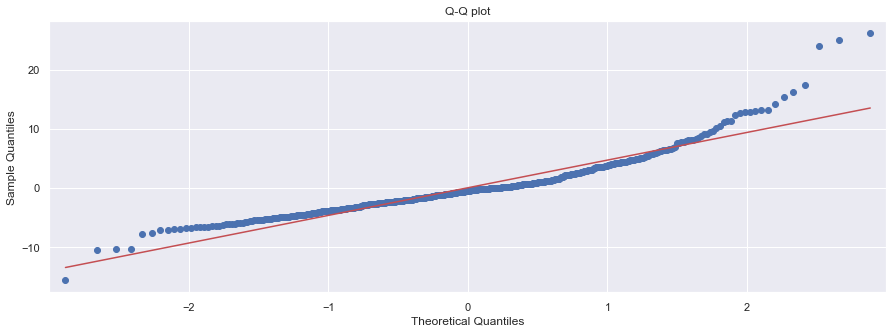

In [19]:
#the residuals do not follow a gaussian distribution
lin_reg_tests.normality_of_residuals_test(mod)

## Modeling (Linear Regression with Target Features)

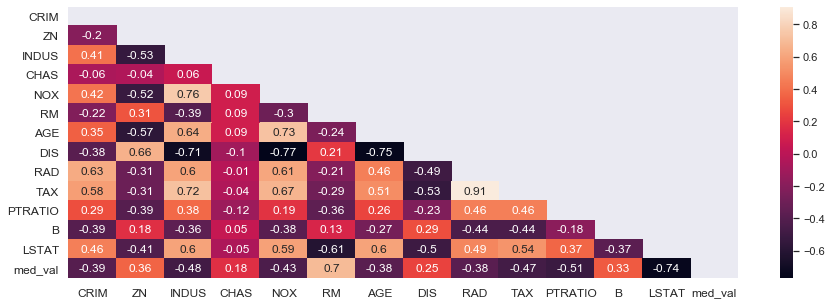

LSTAT     -0.74
PTRATIO   -0.51
INDUS     -0.48
TAX       -0.47
NOX       -0.43
CRIM      -0.39
AGE       -0.38
RAD       -0.38
CHAS       0.18
DIS        0.25
B          0.33
ZN         0.36
RM         0.70
med_val    1.00
Name: med_val, dtype: float64

In [32]:
corr = df.corr().round(2)

fig, ax = plt.subplots(figsize=(15,5))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, annot=True, mask=mask, ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

#raise upper limit and lower lower limit to show top and bottom rows
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

plt.show()

#filter-based feature selection
#I'll use features: LSTAT, PTRATIO, RM, ZN
corr['med_val'].sort_values()

In [33]:
#Pearson's correlation coefficient
from scikitlearn import f_regression()

SyntaxError: invalid syntax (<ipython-input-33-737dd5528ed4>, line 2)

In [34]:
X = df[['ZN','RM','LSTAT','PTRATIO']]
y = df['med_val']

print(X.shape)
print(y.shape)

(506, 4)
(506,)


In [35]:
lr_mod = LinearRegression()
lr_mod.fit(X, y)
lr_preds = lr_mod.predict(X)

#baseline score is .679
lr_mod.score(X,y)

0.6789744677198571

In [36]:
#Age, INDUS, and NOX are not statistically significant at 5% confidence
X_constant = sm.add_constant(X)
mod = sm.OLS(y,X_constant).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                med_val   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     264.9
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          4.18e-122
Time:                        09:42:54   Log-Likelihood:                -1552.8
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     501   BIC:                             3137.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1480      3.993      4.795      0.0

X:\Users\AC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
#low multicollinearity with these four
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

ZN        RM     LSTAT   PTRATIO
vif  1.31047  1.655443  1.788022  1.293658

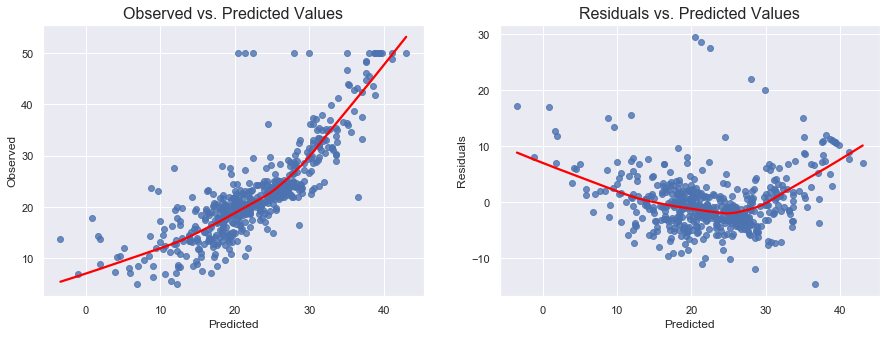

In [39]:
#linear assumption not satisfied
#points are not symmetrically distributed around the lines
#systematically underpredicting
lin_reg_tests.linearity_test(mod, y)

# Removed med_val Outliers

In [ ]:
#what happens when I remove outliers from med_val
#model based on all independent variables can explain a little more R2 of .741 vs .762
#linearity improves, but still not perfect

In [63]:
q1, q3 = np.percentile(df['med_val'],[25,75])
lower = q1 - (1.5 * stats.iqr(df['med_val']))
upper = q3 + (1.5 * stats.iqr(df['med_val']))
print('med_val range: ',lower, '-->', upper)
outliers_removed = df.loc[(df['med_val']>lower) & (df['med_val']<upper)]
print(outliers_removed.shape)
outliers_removed.head() 

med_val range:  5.0624999999999964 --> 36.962500000000006
(466, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  med_val  
0     15.3  396.90   4.98     24.0  
1     17.8  396.90   9.14     21.6  
2     17.8  392.83   4.03     34.7  
3     18.7  394.63   2.94     33.4  
4     18.7  396.90   5.33     36.2

In [59]:
X = outliers_removed[outliers_removed.columns.drop(['med_val'])]
y = outliers_removed['med_val']

X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                med_val   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     111.4
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          8.05e-132
Time:                        10:37:00   Log-Likelihood:                -1194.8
No. Observations:                 466   AIC:                             2418.
Df Residuals:                     452   BIC:                             2476.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.4712      3.615     10.917      0.0

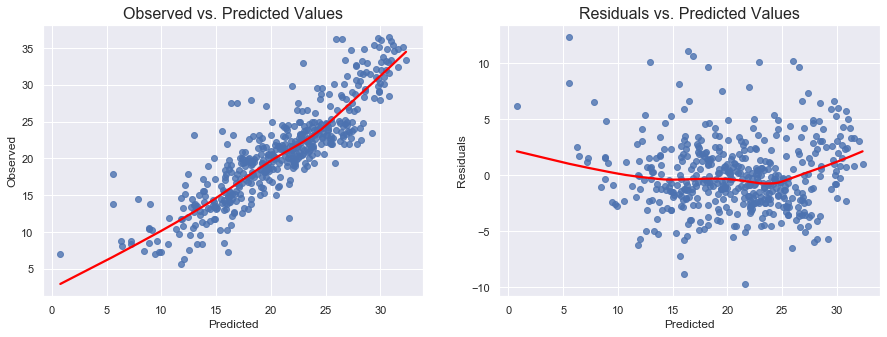

In [60]:
#linear assumption not satisfied
#points are not symmetrically distributed around the lines
#systematically underpredicting
lin_reg_tests.linearity_test(model, y)

In [64]:
model.resid.mean()

2.2097726605157192e-14

In [61]:
#remove Tax, RAD (these two are highly correlated)
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

CRIM        ZN    INDUS      CHAS       NOX        RM       AGE  \
vif  1.850629  2.357394  3.90505  1.070815  4.335213  1.718213  3.119383   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
vif  4.127129  7.402633  8.721134  1.640866  1.375674  2.949962

In [55]:
#filter-based feature selection
#I'll use features: LSTAT, INDUS, RM, ZN, DIS

corr = outliers_removed.corr().round(2)
corr['med_val'].sort_values()

LSTAT     -0.77
INDUS     -0.61
TAX       -0.59
NOX       -0.57
AGE       -0.56
RAD       -0.50
PTRATIO   -0.49
CRIM      -0.48
CHAS       0.10
B          0.41
ZN         0.44
DIS        0.44
RM         0.57
med_val    1.00
Name: med_val, dtype: float64

In [51]:
#still get a high condition number
X = outliers_removed[outliers_removed.columns.drop(['RAD','TAX','med_val'])]
y = outliers_removed['med_val']

X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                med_val   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     122.7
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          2.16e-128
Time:                        09:56:19   Log-Likelihood:                -1208.0
No. Observations:                 466   AIC:                             2440.
Df Residuals:                     454   BIC:                             2490.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1544      3.474     10.119      0.0

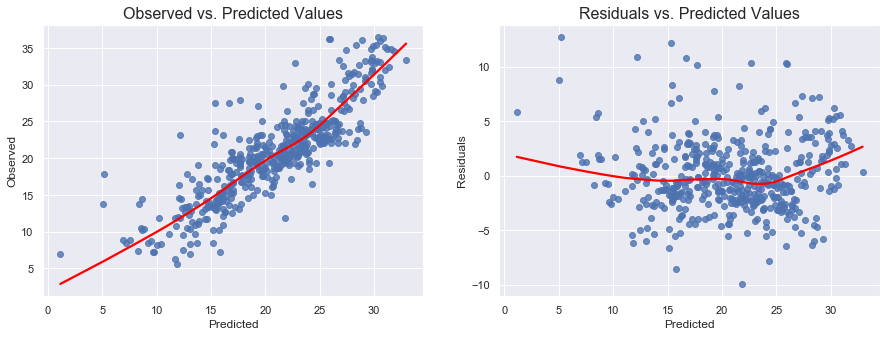

In [53]:
#closer to linearity assumption, but not perfect
#still slightly skewed towards underpredicting, but better than before
lin_reg_tests.linearity_test(model, y)

## Train-test split

In [41]:
X = df[['ZN','RM','LSTAT','PTRATIO']]
y = df['med_val']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .2, random_state = 421)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 4) (102, 4)
(404,) (102,)


In [72]:
lr_mod = LinearRegression()
lr_mod.fit(X_train, y_train)
lr_pred = lr_mod.predict(X_test)

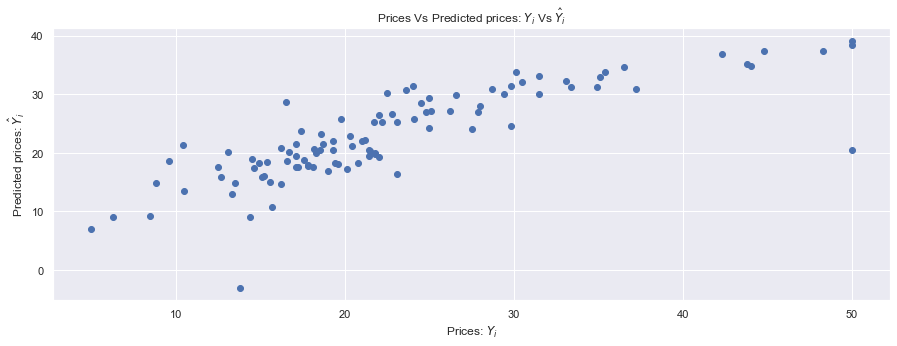

In [73]:
#plot predicted prices vs actuals
plt.scatter(y_test, lr_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [74]:
#better than baseline?
lr_mod.score(X_test, y_test)

0.6753571559877042

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 3.760031368732312
Mean Squared Error: 30.22672010715313
Root Mean Squared Error: 5.4978832387704575


## Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr_mod, X_train, y_train, cv=5)

array([0.737392  , 0.70088039, 0.51172559, 0.72255274, 0.7002127 ])

In [68]:
cv_df = pd.DataFrame()
def cv_scores(model, X, y, cv):
    for cv_count in range(5,cv+1):
        cv_df[cv_count] = pd.Series(cross_val_score(model, X, y, cv=cv_count)).describe()
    return cv_df

In [69]:
cv_scores(lr_mod, X_train, y_train, cv=10)
#seems like less k-folds leads to better scores, less overfitting

5         6         7         8         9          10
count  5.000000  6.000000  7.000000  8.000000  9.000000  10.000000
mean   0.674553  0.676224  0.665786  0.672404  0.667110   0.680300
std    0.092354  0.123338  0.114894  0.120918  0.143305   0.129181
min    0.511726  0.437261  0.484579  0.427503  0.359893   0.404783
25%    0.700213  0.684974  0.597216  0.632447  0.640766   0.624875
50%    0.700880  0.708035  0.699295  0.692702  0.709847   0.687934
75%    0.722553  0.727000  0.741780  0.744225  0.763162   0.773627
max    0.737392  0.793406  0.798633  0.814161  0.823006   0.847863

## Modeling (KNN)

## RandomForrest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [ ]:
print(sklearn.metrics.mean_absolute_error(Y_test, y_pred))
print(np.sqrt(mse))

In [ ]:
print(rf.score(X_test , y_test))

In [ ]:
sns.distplot(y_pred)

In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

test_score = r2_score(y_test , y_pred)
spearman = spearmanr(y_test, y_pred)
pearson = pearsonr(y_test, y_pred)
print("Out of Bag R2 Score" , rf.oob_score_)
print("Test Data R2 Score:" , test_score)
print("Test Data Spearman Correlation:" ,  round(spearman[0], 3))
print("Test Data Pearson Correlation" , round(pearson[0],3))

### Challenge: Create a line plot of `ZN` and `INDUS` in the housing data. 

- For `ZN`, use a solid green line. For `INDUS`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

In [ ]:
#ZN vs INDUS scatter plot
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

In [ ]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=[x**2 for x in housing['DIS']]);